In [1]:
# Import the required libraries.
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

# from moviepy.editor import *
# %matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [3]:
# import cv2
# import matplotlib.pyplot as plt

# # Load the DataFrame from the CSV file
# df = pd.read_csv('ucf101_train.csv')

# # Get the path of the first video
# video_path = df.loc[0, 'path']

# # Open the video file
# cap = cv2.VideoCapture(video_path)

# # Read the first frame
# ret, frame = cap.read()

# # Check if the frame was read successfully
# if ret:
#     # Convert the frame from BGR to RGB format
#     frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
#     # Display the frame using Matplotlib
#     plt.figure(figsize=(10, 10))
#     plt.imshow(frame_rgb)
#     plt.axis('off')
#     plt.show()
# else:
#     print("Error: Could not read the frame.")

# # Release the video capture object
# cap.release()


Processing video: ucf101_top5/train/ShavingBeard/v_ShavingBeard_g09_c02.avi
Processing video: ucf101_top5/train/Punch/v_Punch_g12_c06.avi
Processing video: ucf101_top5/train/PlayingCello/v_PlayingCello_g23_c07.avi
Processing video: ucf101_top5/train/CricketShot/v_CricketShot_g18_c01.avi
Processing video: ucf101_top5/train/TennisSwing/v_TennisSwing_g14_c02.avi


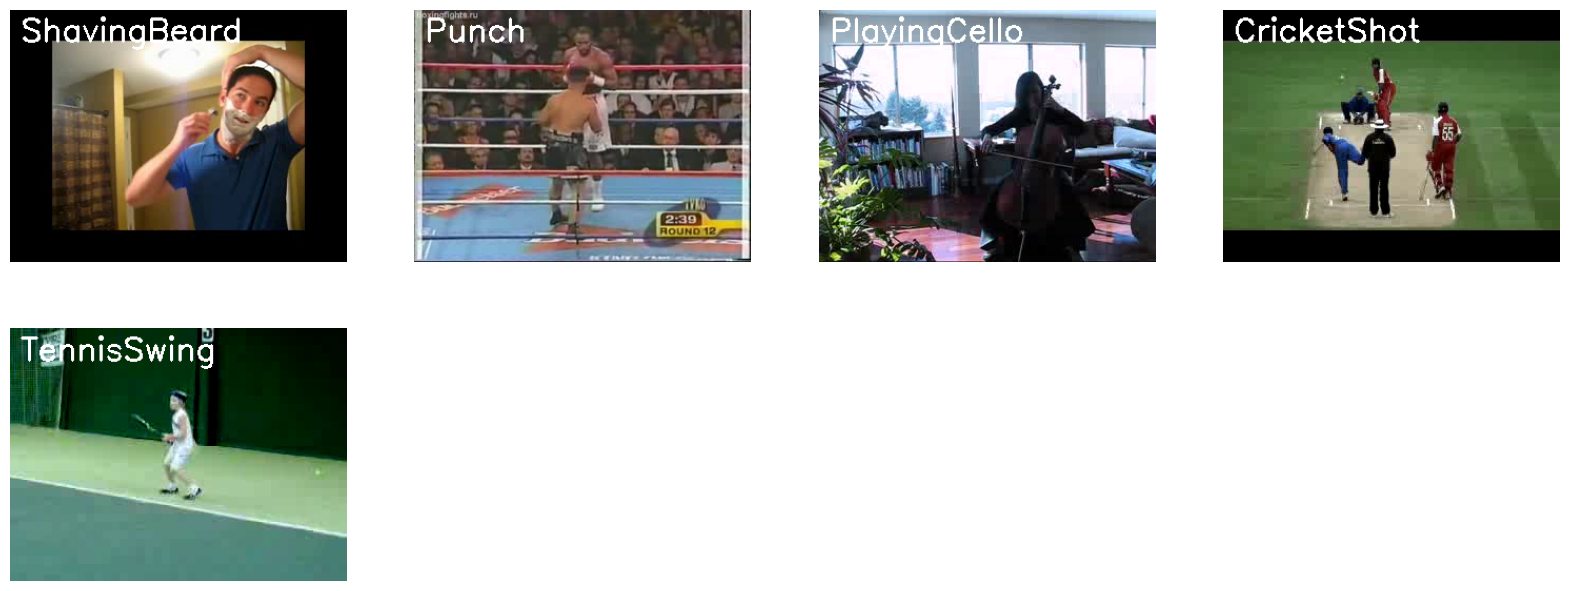

In [4]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize=(20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('ucf101_top5/train')

# Ensure there are at least 20 classes to sample from.
sample_size = min(20, len(all_classes_names))

# Generate a list of random values. The values will be between 0 and the total number of classes in the dataset.
random_range = random.sample(range(len(all_classes_names)), sample_size)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'ucf101_top5/train/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Construct the full path to the video file
    video_file_path = f'ucf101_top5/train/{selected_class_Name}/{selected_video_file_name}'
    print(f"Processing video: {video_file_path}")

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(video_file_path)
    
    # Check if the video was successfully opened
    if not video_reader.isOpened():
        print(f"Error opening video file: {video_file_path}")
        continue
    
    # Read the first frame of the video file.
    success, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    video_reader.release()

    # Check if the frame was successfully read
    if not success:
        print(f"Error reading frame from video file: {video_file_path}")
        continue

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

plt.show()

In [47]:
os.listdir('ucf101_top5/train/CricketShot')

['v_CricketShot_g08_c01.avi',
 'v_CricketShot_g08_c02.avi',
 'v_CricketShot_g08_c03.avi',
 'v_CricketShot_g08_c04.avi',
 'v_CricketShot_g08_c05.avi',
 'v_CricketShot_g08_c06.avi',
 'v_CricketShot_g08_c07.avi',
 'v_CricketShot_g09_c01.avi',
 'v_CricketShot_g09_c02.avi',
 'v_CricketShot_g09_c03.avi',
 'v_CricketShot_g09_c04.avi',
 'v_CricketShot_g09_c05.avi',
 'v_CricketShot_g09_c06.avi',
 'v_CricketShot_g09_c07.avi',
 'v_CricketShot_g10_c01.avi',
 'v_CricketShot_g10_c02.avi',
 'v_CricketShot_g10_c03.avi',
 'v_CricketShot_g10_c04.avi',
 'v_CricketShot_g10_c05.avi',
 'v_CricketShot_g10_c06.avi',
 'v_CricketShot_g10_c07.avi',
 'v_CricketShot_g11_c01.avi',
 'v_CricketShot_g11_c02.avi',
 'v_CricketShot_g11_c03.avi',
 'v_CricketShot_g11_c04.avi',
 'v_CricketShot_g11_c05.avi',
 'v_CricketShot_g11_c06.avi',
 'v_CricketShot_g11_c07.avi',
 'v_CricketShot_g12_c01.avi',
 'v_CricketShot_g12_c02.avi',
 'v_CricketShot_g12_c03.avi',
 'v_CricketShot_g12_c04.avi',
 'v_CricketShot_g12_c05.avi',
 'v_Cricke

In [6]:
import os
import numpy as np

def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)

    if not video_reader.isOpened():
        print(f"Error: Could not open video file '{video_path}'.")
        return frames_list

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)
    
    video_reader.release()
    return frames_list

def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''
    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Extracting Data of Class: {class_name}')
        class_dir = os.path.join(DATASET_DIR, class_name)

        if not os.path.isdir(class_dir):
            print(f"Error: Directory '{class_dir}' does not exist.")
            continue
        
        files_list = os.listdir(class_dir)
        
        if not files_list:
            print(f"Error: No video files found in class '{class_name}'.")
            continue
        
        for file_name in files_list:
            video_file_path = os.path.join(class_dir, file_name)
            
            if not os.path.isfile(video_file_path):
                print(f"Error: File '{video_file_path}' does not exist.")
                continue

            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    features = np.asarray(features)
    labels = np.array(labels)
    
    return features, labels, video_files_paths

# Define constants
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
SEQUENCE_LENGTH = 20
DATASET_DIR = 'ucf101_top5/train'
CLASSES_LIST = ['CricketShot', 'PlayingCello', 'Punch', 'ShavingBeard', 'TennisSwing']

features, labels, video_files_paths = create_dataset()


Extracting Data of Class: CricketShot
Extracting Data of Class: PlayingCello
Extracting Data of Class: Punch
Extracting Data of Class: ShavingBeard
Extracting Data of Class: TennisSwing


In [46]:
features

NameError: name 'features' is not defined

In [7]:
one_hot_encoded_labels = to_categorical(labels)

In [8]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

In [9]:
def create_convlstm_model():
    '''
    This function will construct the required convlstm model.
    Returns:
        model: It is the required constructed convlstm model.
    '''

    # We will use a Sequential model for model construction
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(Flatten()) 
    
    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))
    
    ########################################################################################################################
     
    # Display the models summary.
    model.summary()
    
    # Return the constructed convlstm model.
    return model

In [10]:
# Construct the required convlstm model.
convlstm_model = create_convlstm_model()

# Display the success message. 
print("Model Created Successfully!")

C:\Users\indug\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)             │ (None, 20, 62, 62, 4)       │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 20, 31, 31, 4)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 20, 31, 31, 4)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)           │ (None, 20, 29, 29, 8)       │           3,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 20, 15, 15, 8)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 20, 15, 15, 8)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)           │ (None, 20, 13, 13, 14)      │          11,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 20, 7, 7, 14)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 20, 7, 7, 14)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_3 (ConvLSTM2D)           │ (None, 20, 5, 5, 16)        │          17,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 20, 3, 3, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2880)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │          14,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,405 (185.18 KB)

 Trainable params: 47,405 (185.18 KB)

 Non-trainable params: 0 (0.00 B)

Model Created Successfully!


In [11]:
from tensorflow.keras.utils import plot_model
plot_model(convlstm_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [12]:
# pip install pydotplus

In [13]:
# pip install graphviz

In [14]:
# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 30, batch_size = 4,
                                                     shuffle = True, validation_split = 0.2, 
                                                     callbacks = [early_stopping_callback])


Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 34s 178ms/step - accuracy: 0.3123 - loss: 1.5581 - val_accuracy: 0.7191 - val_loss: 1.0544
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.5961 - loss: 1.0515 - val_accuracy: 0.7303 - val_loss: 0.7099
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - accuracy: 0.7917 - loss: 0.6640 - val_accuracy: 0.8315 - val_loss: 0.4160
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.8633 - loss: 0.3468 - val_accuracy: 0.9213 - val_loss: 0.2390
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.9120 - loss: 0.2377 - val_accuracy: 0.8876 - val_loss: 0.3319
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.9424 - loss: 0.1787 - val_accuracy: 0.8989 - val_loss: 0.2666
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.9137 - loss: 0.1876 - val_accuracy: 0.8876 - val_loss: 0.4350
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.9599 - loss: 0.1246 - val_accu

In [33]:
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.9601 - loss: 0.1096


In [51]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'convlstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save your Model.
convlstm_model.save(model_file_name)

In [35]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

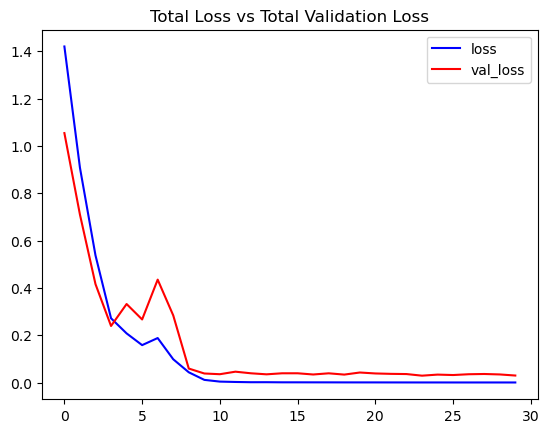

In [36]:
# Visualize the training and validation loss metrices.
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

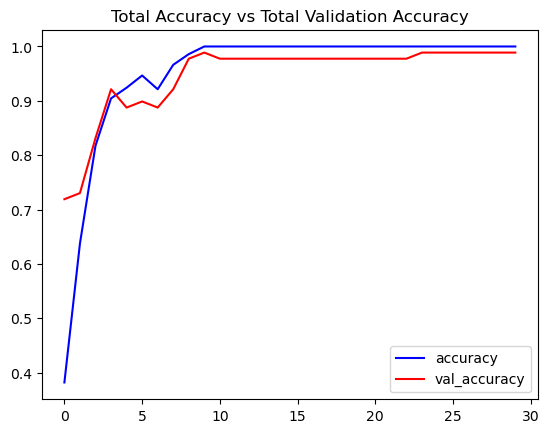

In [37]:
# Visualize the training and validation accuracy metrices.
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

In [38]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [39]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_15                  │ (None, 20, 64, 64, 16)      │             448 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_16                  │ (None, 20, 16, 16, 16)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_17                  │ (None, 20, 16, 16, 16)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_18                  │ (None, 20, 16, 16, 32)      │           4,640 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_19                  │ (None, 20, 4, 4, 32)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_20                  │ (None, 20, 4, 4, 32)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_21                  │ (None, 20, 4, 4, 64)        │          18,496 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_22                  │ (None, 20, 2, 2, 64)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_23                  │ (None, 20, 2, 2, 64)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_24                  │ (None, 20, 2, 2, 64)        │          36,928 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_25                  │ (None, 20, 1, 1, 64)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_26                  │ (None, 20, 64)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,093 (285.52 KB)

 Trainable params: 73,093 (285.52 KB)

 Non-trainable params: 0 (0.00 B)

Model Created Successfully!


In [40]:
# Plot the structure of the contructed LRCN model.
plot_model(LRCN_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [41]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 40, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.2360 - loss: 1.6282 - val_accuracy: 0.4607 - val_loss: 1.5860
Epoch 2/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.3467 - loss: 1.4930 - val_accuracy: 0.7079 - val_loss: 1.1163
Epoch 3/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.6224 - loss: 1.0561 - val_accuracy: 0.7528 - val_loss: 0.7581
Epoch 4/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.6612 - loss: 0.9013 - val_accuracy: 0.7303 - val_loss: 0.7877
Epoch 5/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - accuracy: 0.5464 - loss: 1.2218 - val_accuracy: 0.8315 - val_loss: 0.5816
Epoch 6/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.7886 - loss: 0.6117 - val_accuracy: 0.8427 - val_loss: 0.4682
Epoch 7/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - accuracy: 0.8403 - loss: 0.4800 - val_accuracy: 0.8090 - val_loss: 0.4625
Epoch 8/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.8380 - loss: 0.4682 - val_accu

In [42]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9706 - loss: 0.1087


In [52]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the Model.
LRCN_model.save(model_file_name)

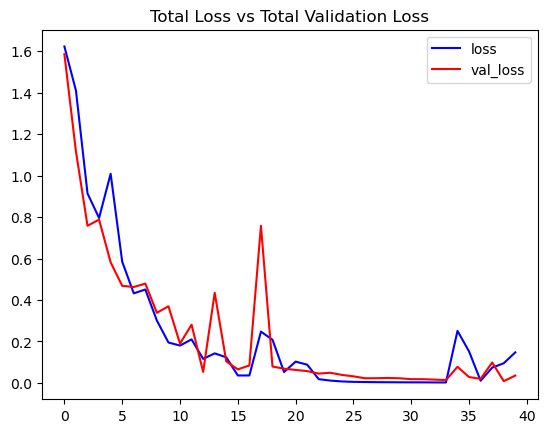

In [44]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

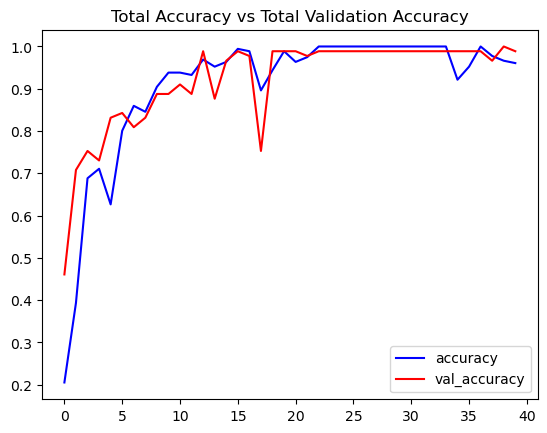

In [45]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [48]:
# !pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz


In [48]:
import tensorflow as tf
# Load the trained model
model_path = r"C:\Users\indug\actionrecognitionusingtransformer\LRCN_model___Date_Time_2024_08_01__20_37_57___Loss_0.12329408526420593___Accuracy_0.9664429426193237.h5"
model = tf.keras.models.load_model(model_path)


In [8]:
# import numpy as np
# import tensorflow as tf

# # Load the trained model
# model_path = r"C:\Users\indug\actionrecognitionusingtransformer\LRCN_model___Date_Time_2024_08_01__20_37_57___Loss_0.12329408526420593___Accuracy_0.9664429426193237.h5"
# model = tf.keras.models.load_model(model_path)

# # Example input data for prediction
# # Adjust the shape to match (batch_size, sequence_length, height, width, channels)
# batch_size = 1
# sequence_length = 20
# height = 64
# width = 64
# channels = 3

# # Create random input data with the correct shape
# input_data = np.random.random((batch_size, sequence_length, height, width, channels))

# # Make predictions
# predictions = model.predict(input_data)
# print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[2.0132673e-03 4.9165939e-03 9.9189341e-01 3.1371217e-04 8.6300174e-04]]


In [49]:
import pandas as pd

# Load the CSV file
csv_file_path = 'C:/Users/indug/actionrecognitionusingtransformer/ucf101_top5/train.csv'
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
print(data.head())


                  video_name          tag
0  v_CricketShot_g08_c01.avi  CricketShot
1  v_CricketShot_g08_c02.avi  CricketShot
2  v_CricketShot_g08_c03.avi  CricketShot
3  v_CricketShot_g08_c04.avi  CricketShot
4  v_CricketShot_g08_c05.avi  CricketShot


In [50]:
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
model_path = r"C:\Users\indug\actionrecognitionusingtransformer\LRCN_model___Date_Time_2024_08_01__20_37_57___Loss_0.12329408526420593___Accuracy_0.9664429426193237.h5"
model = tf.keras.models.load_model(model_path)

# Define the class names
class_names = ["CricketShot", "PlayingCello", "Punch", "ShavingBeard", "TennisSwing"]

def preprocess_video(video_path, sequence_length, height, width):
    # Capture the video
    cap = cv2.VideoCapture(video_path)
    frames = []

    while len(frames) < sequence_length:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (width, height))  # Resize frame
        frames.append(frame)
    
    cap.release()

    # If no frames were captured, raise an error
    if len(frames) == 0:
        raise ValueError("No frames captured from the video. Please check the video path.")

    # If we have fewer frames than sequence_length, pad with the last frame
    while len(frames) < sequence_length:
        frames.append(frames[-1])

    # Convert to numpy array and normalize
    frames = np.array(frames)
    frames = frames / 255.0  # Normalize to [0, 1]
    frames = np.expand_dims(frames, axis=0)  # Add batch dimension
    return frames

# Parameters
sequence_length = 20
height = 64
width = 64

# Example video path (update this path according to your dataset)
example_video_path = r"C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c01.avi"  # Replace with the actual path

# Preprocess the video
input_data = preprocess_video(example_video_path, sequence_length, height, width)

# Make predictions
predictions = model.predict(input_data)
print(predictions)

# Get the index of the highest prediction
highest_pred_index = np.argmax(predictions)

# Get the class name of the highest prediction
highest_pred_class = class_names[highest_pred_index]

# Print the highest prediction class and the corresponding probability
print(f"Highest prediction class: {highest_pred_class}, Probability: {predictions[0][highest_pred_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
[[0.9679403  0.00167751 0.00226033 0.00279607 0.02532577]]
Highest prediction class: CricketShot, Probability: 0.9679402709007263


In [41]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
model_path = r"C:\Users\indug\actionrecognitionusingtransformer\LRCN_model___Date_Time_2024_08_01__20_37_57___Loss_0.12329408526420593___Accuracy_0.9664429426193237.h5"
model = tf.keras.models.load_model(model_path)

# Define the class names
class_names = ["CricketShot", "PlayingCello", "Punch", "ShavingBeard", "TennisSwing"]

def preprocess_video(video_path, sequence_length, height, width):
    # Capture the video
    cap = cv2.VideoCapture(video_path)
    frames = []

    while len(frames) < sequence_length:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (width, height))  # Resize frame
        frames.append(frame)
    
    cap.release()

    # If no frames were captured, raise an error
    if len(frames) == 0:
        raise ValueError("No frames captured from the video. Please check the video path.")

    # If we have fewer frames than sequence_length, pad with the last frame
    while len(frames) < sequence_length:
        frames.append(frames[-1])

    # Convert to numpy array and normalize
    frames = np.array(frames)
    frames = frames / 255.0  # Normalize to [0, 1]
    frames = np.expand_dims(frames, axis=0)  # Add batch dimension
    return frames

def evaluate_model(model, test_dir, sequence_length, height, width, class_names):
    correct_predictions = 0
    total_predictions = 0

    for label_name in class_names:
        video_dir = os.path.join(test_dir, label_name)
        for video_name in os.listdir(video_dir):
            video_path = os.path.join(video_dir, video_name)
            true_label = label_name

            try:
                input_data = preprocess_video(video_path, sequence_length, height, width)
                predictions = model.predict(input_data)
                highest_pred_index = np.argmax(predictions)
                predicted_class = class_names[highest_pred_index]

                print(f"Video: {video_path}, Predicted: {predicted_class}, True: {true_label}, Probability: {predictions[0][highest_pred_index]}")

                if predicted_class == true_label:
                    correct_predictions += 1
                total_predictions += 1
            except Exception as e:
                print(f"Error processing video {video_path}: {e}")

    accuracy = correct_predictions / total_predictions
    return accuracy

# Parameters
sequence_length = 20
height = 64
width = 64

# Test directory
test_dir = r"C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test"

# Evaluate the model
accuracy = evaluate_model(model, test_dir, sequence_length, height, width, class_names)
print(f"Model accuracy on test data: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c01.avi, Predicted: CricketShot, True: CricketShot, Probability: 0.9679402709007263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c02.avi, Predicted: CricketShot, True: CricketShot, Probability: 0.9612619280815125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c03.avi, Predicted: CricketShot, True: CricketShot, Probability: 0.9606503248214722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c04.avi, Predicted: CricketShot, True: CricketShot, Probability: 0.993019163608551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_to

In [44]:
from sklearn.metrics import classification_report


In [45]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

# Load the trained model
model_path = r"C:\Users\indug\actionrecognitionusingtransformer\LRCN_model___Date_Time_2024_08_01__20_37_57___Loss_0.12329408526420593___Accuracy_0.9664429426193237.h5"
model = tf.keras.models.load_model(model_path)

# Define the class names
class_names = ["CricketShot", "PlayingCello", "Punch", "ShavingBeard", "TennisSwing"]

def preprocess_video(video_path, sequence_length, height, width):
    # Capture the video
    cap = cv2.VideoCapture(video_path)
    frames = []

    while len(frames) < sequence_length:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (width, height))  # Resize frame
        frames.append(frame)
    
    cap.release()

    # If no frames were captured, raise an error
    if len(frames) == 0:
        raise ValueError("No frames captured from the video. Please check the video path.")

    # If we have fewer frames than sequence_length, pad with the last frame
    while len(frames) < sequence_length:
        frames.append(frames[-1])

    # Convert to numpy array and normalize
    frames = np.array(frames)
    frames = frames / 255.0  # Normalize to [0, 1]
    frames = np.expand_dims(frames, axis=0)  # Add batch dimension
    return frames

def evaluate_model(model, test_dir, sequence_length, height, width, class_names):
    y_true = []
    y_pred = []

    for label_name in class_names:
        video_dir = os.path.join(test_dir, label_name)
        for video_name in os.listdir(video_dir):
            video_path = os.path.join(video_dir, video_name)
            true_label_index = class_names.index(label_name)

            try:
                input_data = preprocess_video(video_path, sequence_length, height, width)
                predictions = model.predict(input_data)
                highest_pred_index = np.argmax(predictions)
                predicted_class_index = highest_pred_index

                y_true.append(true_label_index)
                y_pred.append(predicted_class_index)

                print(f"Video: {video_path}, Predicted: {class_names[predicted_class_index]}, True: {class_names[true_label_index]}, Probability: {predictions[0][highest_pred_index]}")
            except Exception as e:
                print(f"Error processing video {video_path}: {e}")

    return y_true, y_pred

# Parameters
sequence_length = 20
height = 64
width = 64

# Test directory
test_dir = r"C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test"

# Evaluate the model and get true and predicted labels
y_true, y_pred = evaluate_model(model, test_dir, sequence_length, height, width, class_names)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c01.avi, Predicted: CricketShot, True: CricketShot, Probability: 0.9679402709007263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c02.avi, Predicted: CricketShot, True: CricketShot, Probability: 0.9612619280815125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c03.avi, Predicted: CricketShot, True: CricketShot, Probability: 0.9606503248214722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_top5\test\CricketShot\v_CricketShot_g01_c04.avi, Predicted: CricketShot, True: CricketShot, Probability: 0.993019163608551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Video: C:\Users\indug\actionrecognitionusingtransformer\ucf101_to